In [2]:
import glob
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colormaps as cms

In [3]:
data = pd.read_csv("../logs/edges_2.csv")

columns = data.columns
data.head()

,n_iterations,absolute_error,relative_error,total_path,exit_code,spawn_type
0,101,0.008173,0.204869,14.399634,2,edges
1,104,0.013222,0.331428,9.240755,2,edges
2,106,0.011779,0.295247,12.767557,2,edges
3,131,0.002321,0.058171,13.834867,2,edges
4,116,0.029177,0.731369,4.933716,2,edges


In [4]:
files = glob.glob(".././logs/*.csv")

In [5]:
def get_params_from_path(path: str):
    params = path.split('\\')[-1].split('_')
    n_particles = params[-1][:-4]
    
    spawn_type = " ".join(params[:-1])
    
    return int(n_particles), spawn_type

In [6]:
def compute_mean_and_std(files: list[str], column: str):
    storage = defaultdict(list)
    for file in files:
        n_particles, spawn_type = get_params_from_path(file)
        data = pd.read_csv(file)
        
        current_mean = np.mean(data[column])
        current_std = np.std(data[column])
        current_label = n_particles
        
        storage[spawn_type].append([current_mean, current_std, current_label])
    
    for current_spawn_type in storage.keys():
        storage[current_spawn_type] = sorted(storage[current_spawn_type], key = lambda x: x[2])
        storage[current_spawn_type] = np.array(storage[current_spawn_type])
    
    return storage

In [7]:
def plot_mean_and_std(storage, title: str):
    shift = 0.1
    fig, ax = plt.subplots()
    
    fig.canvas.draw()
    
    for index, key in enumerate(storage.keys()):
        plt.errorbar(np.arange(1, len(storage[key]) + 1) + index*shift, storage[key][:, 0], storage[key][:, 1],
                     linestyle='None', marker='.', label=key)
    plt.xticks(range(1, len(storage[key]) + 1))
    
    ax.set_xticklabels(storage[key][:, 2])
    
    plt.xlabel("Количество агентов")
    # plt.ylabel(title)
    ax.grid(which='major', alpha=0.5)
    
    locs, _ = plt.yticks()
    
    minor_ticks = []
    for i in range(1, len(locs)):
        start = locs[i-1]
        finish = locs[i]
        for minor_tick in np.linspace(start, finish, 5, endpoint=False):
            minor_ticks.append(minor_tick)
        
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="minor", alpha=0.3)
    
    
    plt.legend(loc="best")
    plt.title(title)
    
    plt.show()

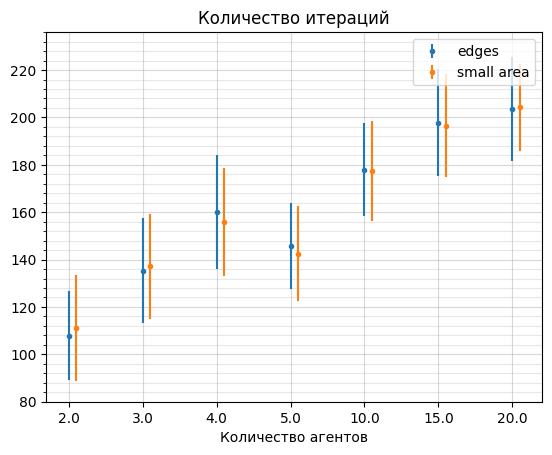

In [8]:
storage = compute_mean_and_std(files, "n_iterations")
plot_mean_and_std(storage, "Количество итераций")

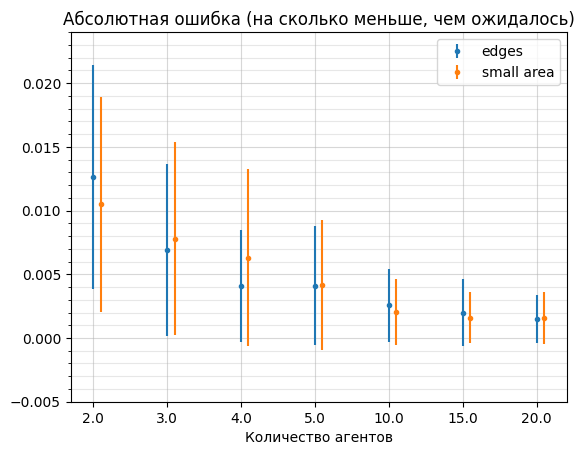

In [9]:
storage = compute_mean_and_std(files, "absolute_error")
plot_mean_and_std(storage, "Абсолютная ошибка (на сколько меньше, чем ожидалось)")

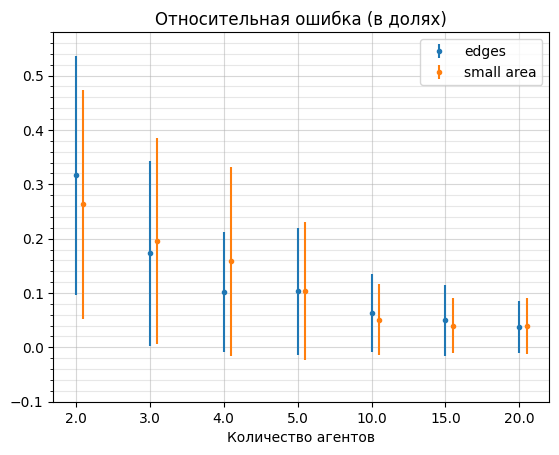

In [10]:
storage = compute_mean_and_std(files, "relative_error")
plot_mean_and_std(storage, "Относительная ошибка (в долях)")

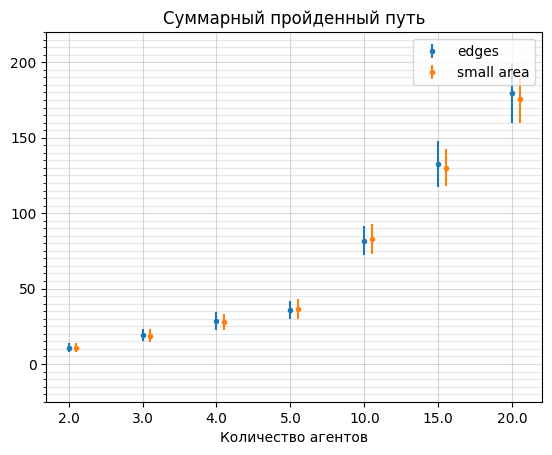

In [11]:
storage = compute_mean_and_std(files, "total_path")
plot_mean_and_std(storage, "Суммарный пройденный путь")

In [12]:
storage = defaultdict(list)

for file in files:
    data = pd.read_csv(file)
    n_particles, spawn_type = get_params_from_path(file)
    
    value_count = data['exit_code'].value_counts()
    storage[spawn_type].append([value_count[1], value_count[2], n_particles])

for current_spawn_type in storage.keys():
    storage[current_spawn_type] = sorted(storage[current_spawn_type], key = lambda x: x[2])
    storage[current_spawn_type] = np.array(storage[current_spawn_type])

KeyError: 1

In [ ]:
data = pd.read_csv(files[0])
codes = list(data['exit_code'].value_counts().index)
n_codes = len(codes)

In [ ]:
code2label = {1: "around answer", 2: "small velocity"}

In [ ]:
n_keys = len(storage.keys())

width = 0.8 / n_keys

x = np.arange(len(storage[list(storage.keys())[0]][:, 2]))

fig, axes = plt.subplots(1, n_keys, figsize=(4*n_keys,6), sharey=True)

for index_i, key in enumerate(storage.keys()):
    for index_j in range(n_codes):
        axes[index_i].bar(x + index_j*width, storage[key][:, index_j], width=width, label = code2label[index_j+1])
        
    axes[index_i].set_xticks(x)
    axes[index_i].set_xticklabels(storage[key][:, 2])
    
    axes[index_i].grid(which="major", alpha=0.5)
    
    locs = axes[index_i].get_yticks()
    
    minor_ticks = []
    for i in range(1, len(locs)):
        start = locs[i-1]
        finish = locs[i]
        for minor_tick in np.linspace(start, finish, 5, endpoint=False):
            minor_ticks.append(minor_tick)
    
    axes[index_i].set_yticks(minor_ticks, minor=True)
    axes[index_i].grid(which="minor", alpha=0.3)
    
    axes[index_i].legend()
    axes[index_i].set_title('Генерация ' + '"' + str(key) + '"')
    
plt.show()